In [ ]:
import numpy as np
import hockeyey_env as h_env
from hockey.hockey_env import Mode
import gymnasium as gym
from importlib import reload
import time

from torchrl.data import PrioritizedReplayBuffer, ListStorage
rb = PrioritizedReplayBuffer(alpha=0.7, beta=0.4, storage=ListStorage(10))

In [3]:
np.set_printoptions(suppress=True)

In [4]:
reload(h_env)

/mnt/lustre/work/ponsmoll/pba549/.conda/envs/RL-Hockey-Agent/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/mnt/lustre/work/ponsmoll/pba549/.conda/envs/RL-Hockey-Agent/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from '/mnt/lustre/work/ponsmoll/pba549/.conda/envs/RL-Hockey-Agent/lib/python3.10/site-packages/hockey/hockey_env.py'>

# Normal Game Play

In [5]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [9]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()
print(obs)
print(obs_agent2)

[-3.          0.          0.          0.          0.          0.
  3.          0.          0.          0.          0.          0.
 -1.58397436 -0.0749495   0.          0.          0.          0.        ]
[-3.         -0.          0.         -0.         -0.          0.
  3.         -0.          0.         -0.         -0.          0.
  1.58397436  0.0749495  -0.         -0.          0.          0.        ]


In [10]:
obs

array([-3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  3.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -1.58397436, -0.0749495 ,  0.        ,
        0.        ,  0.        ,  0.        ])

one episode with random agents

In [7]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

In [8]:
env.render(mode="human")
a1 = np.random.uniform(-1,1,4)
a2 = np.random.uniform(-1,1,4)    
obs, r, d, t, info = env.step(np.hstack([a1,a2]))

obs2, info2 = env.obs_agent_two(), env.get_info_agent_two()
r2 = env.get_reward_agent_two(info2)
print("obs", obs)
print("info", info)
print("r", r)

print("============================")
print("obs2", obs2)
print("info2", info2)
print("r2", r2)

obs_agent2 = env.obs_agent_two()
if d or t: 1/0

obs [-3.02367306  0.01470375 -0.03290598 -1.18034065  0.93648362 -1.6452992
  2.990695    0.02285814 -0.00704755 -0.4653832   1.09977603 -0.35237759
 -1.18305922  0.8978157   0.          0.          0.          0.        ]
info {'winner': 0, 'reward_closeness_to_puck': -0.11759073558661415, 'reward_touch_puck': 0.0, 'reward_puck_direction': 0.0}
r -0.11759073558661415
obs2 [-2.990695   -0.02285814 -0.00704755  0.4653832  -1.09977603 -0.35237759
  3.02367306 -0.01470375 -0.03290598  1.18034065 -0.93648362 -1.6452992
  1.18305922 -0.8978157  -0.         -0.          0.          0.        ]
info2 {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.0}
r2 0.0


In [9]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    print("obs", obs)
    print("info", info)
    print("r", r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

obs [-3.03140306  0.02248764  0.02109282 -1.56878591  0.99532127  1.05464113
  2.98261356 -0.02936482  0.01246387 -0.86980647 -1.39198208  0.62319374
  1.87657642  0.94992399  0.          0.          0.          0.        ]
info {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': 0.0}
r 0.0
obs [-3.02329636  0.05991983  0.04184765  0.40933684  1.74467289  1.03774154
  2.98339462 -0.02596426 -0.0124612   0.03904116  0.01752749 -1.24625349
  1.87657642  0.94992399  0.          0.          0.          0.        ]
info {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': 0.0}
r 0.0
obs [-3.03384399  0.06438684  0.07520819 -0.51544213  0.019593    1.66802692
  3.01185989  0.00321674 -0.02357369  1.42202473  1.39107227 -0.5556249
  1.87657642  0.94992399  0.          0.          0.          0.        ]
info {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction'

In [10]:
rb.add((obs, obs, a1, r, d, ))

0

In [14]:
dir(rb.storage)

['__annotations__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attached_entities',
 '_attached_entities_iter',
 '_attached_entities_list',
 '_checkpointer',
 '_compilable',
 '_default_checkpointer',
 '_empty',
 '_is_full',
 '_max_size_along_dim0',
 '_rand_given_ndim',
 '_rng',
 '_storage',
 'attach',
 'checkpointer',
 'contains',
 'dump',
 'dumps',
 'flatten',
 'get',
 'load',
 'load_state_dict',
 'loads',
 'max_size',
 'ndim',
 'save',
 'set',
 'shape',
 'state_dict']

In [11]:
rb.sample(1, return_info=True)

/mnt/lustre/work/ponsmoll/pba549/.conda/envs/RL-Hockey-Agent/lib/python3.10/site-packages/torchrl/data/replay_buffers/samplers.py:503: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = self._sum_tree.scan_lower_bound(mass)


TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [13]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': -0.10125197918340798,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [45]:
env.close()

# Train Shooting

In [50]:
env = h_env.HockeyEnv(mode=Mode.TRAIN_SHOOTING)

In [60]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [61]:
env.close()

# Train DEFENDING

In [63]:
env = h_env.HockeyEnv(mode=Mode.TRAIN_DEFENSE)

In [77]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
0.0
0.0
-0.46508823836470914
-0.3748044727282909
-0.28475936476183494
-0.19574849632882477
-0.11099534158062574
-0.056767593116332525
-0.1403370713595812
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.4032884376343933
-0.3622851564682635
-0.34290122247980664
-0.34869725662693196
-0.3784595339713791
-0.4271552677575128
-0.4891158154235241
-0.5599138429829895
-0.6365715138799037
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [78]:
env.close()

# Using discrete actions

In [79]:
import random

In [81]:
env = h_env.HockeyEnv(mode=Mode.TRAIN_SHOOTING)

In [82]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [83]:
env.close()

# Hand-crafted Opponent

In [544]:
env = h_env.HockeyEnv()

In [545]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [546]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

In [648]:
env.render()

a1 = player1.act(obs)
a2 = player2.act(obs_agent2)

obs, r, d, t, info = env.step(np.hstack([a1,a2]))
obs_agent2 = env.obs_agent_two()
info2 = env.get_info_agent_two()
r2 = env.get_reward_agent_two(info2)

print("obs", obs)
print("info", info)
print("r", r)

print("============================")
print("obs2", obs_agent2)
print("info2", info2)
print("r2", r2)

obs_agent2 = env.obs_agent_two()
if d or t: 1/0

obs [ -3.35750246   1.81706142  -0.67026293   3.01429248   0.52713686
   3.84469151   3.46118927   0.02070332   0.01945256   0.16284962
  -0.01678698  -0.36935315   1.37069225   1.24749851  -4.00415087
 -15.84553242   0.           0.        ]
info {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.0006406641387939454}
r 0.0
obs2 [-3.46118927 -0.02070332  0.01945256 -0.16284962  0.01678698 -0.36935315
  3.35750246 -1.81706142 -0.67026293 -3.01429248 -0.52713686  3.84469151
 -1.37069225 -1.24749851  4.00415087 15.84553242  0.          0.        ]
info2 {'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': 0.0006406641387939454}
r2 0.0


: 

In [87]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [89]:
np.mean(obs_buffer,axis=0)

array([-2.90950121,  0.03197282, -0.01958894,  0.08063851, -0.03141036,
        0.18079221,  2.97451242,  0.11161271,  0.0408023 , -0.07136622,
        0.00747247, -0.02031661,  0.61112845,  0.07253982,  1.54779736,
       -0.20330783,  2.17813765,  2.12550607])

In [90]:
np.std(obs_buffer,axis=0)

array([ 0.68803245,  0.37990723,  0.64642733,  4.27461448,  2.50192443,
        3.59214004,  0.41685057,  0.38270398,  0.13258764,  2.64750115,
        1.61197355,  0.7041208 ,  2.0790864 ,  1.27181556, 19.6322122 ,
       13.68324192,  4.42579938,  4.41249115])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [91]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [92]:
import pylab as plt

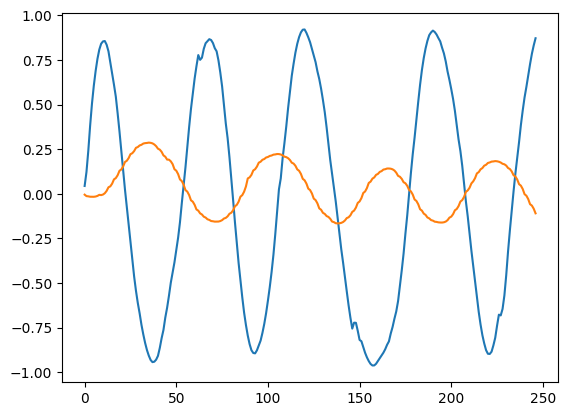

In [93]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

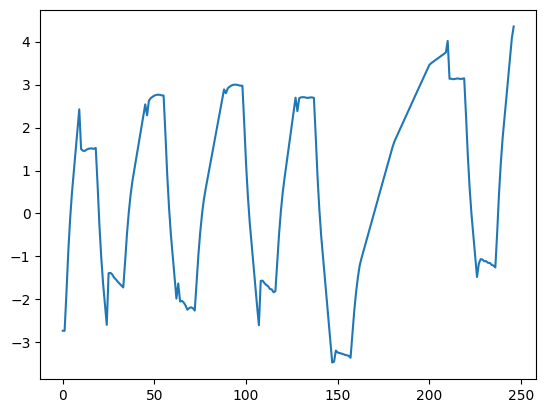

In [94]:
plt.plot(obs_buffer[:,12])

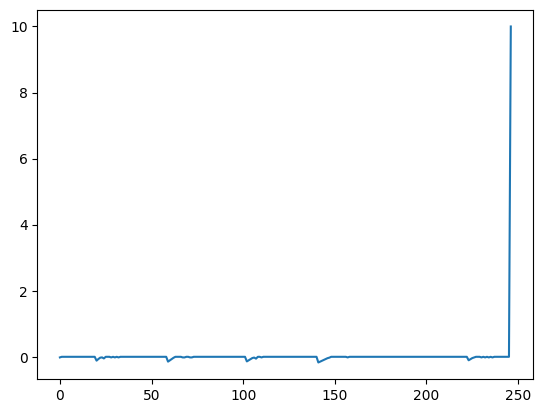

In [95]:
plt.plot(reward_buffer[:])

In [96]:
np.sum(reward_buffer)

7.7894873464484595

In [97]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0019623870849609375},
 {'winner': -1,
  'reward_closeness_to_puck': -0.0932487468135335,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0019623870849609375},
 10.0,
 -10.093248746813533)

In [98]:
env.close()

# Human Opponent

In [104]:
env = h_env.HockeyEnv()

In [105]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [106]:
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [107]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [108]:
env.close()

# Check side consistency

In [109]:
env = h_env.HockeyEnv()

In [110]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [111]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [112]:
obs_buffer.shape

(150235, 18)

In [113]:
np.mean(obs_buffer,axis=0)

array([-2.96944014,  0.01488494, -0.00033168, -0.05623349, -0.00169841,
        0.01311805,  2.97143476,  0.00394331,  0.00054211,  0.05446922,
        0.00567125, -0.00374848, -0.02268717,  0.01459864, -0.0431308 ,
        0.00312048,  1.10007655,  1.07212034])

In [114]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([ 0.00032586, -0.0080155 , -0.00016617, -0.00131795, -0.00362759,
       -0.00241274, -0.00032597,  0.00795176,  0.00016614,  0.00131622,
        0.00361448,  0.00240694,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01143439, -0.01156665])

In [115]:
winner_buffer

[-1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 0,
 1,
 1,
 0,
 0,
 1

In [116]:
np.mean(winner_buffer,axis=0)

-0.028

In [117]:
np.std(winner_buffer,axis=0)

0.8020074812618646

In [118]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(-4647.117498890644, -4113.301383209601)

In [119]:
env.close()